<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Models/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost 

XGBoost stands for eXtreme Gradient Boosting.
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
This algorithm is ideally performed on large complicated datasets.

### Note: 
In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. 

### Why does XGBoost perform so well?
XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.
![image.png](attachment:image.png)

Read(For understanding): https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

![image.png](attachment:image.png)

# XGBoost for Regression

### Steps:

* Firstly, the fitting of the training data is done by making an initial prediction of the target value. This value can be anything but by default it is 0.5, regardless of whether you are using for regression or classification.
*  Now, just like the unextreme gradient boost, XGBoost fits the regression tree to the residuals. However, unlike gradient boost which uses regular off the shelf Regession trees, xgboost uses a unique regression tree

##### Building the unique DT in XGBoost:
* Each tree starts out with a single tree and all the residuals go to the leaf. Now, we calculate a quality score or similarity score for the residuals. 
`Similarity score= (Sum of residuals)^2 / (Number of Residuals + lambda)`
Here, lambda is a Regularisation parameter.
Split the residuals and calculate the respective Similarity score for each node. Splitting is done by puuting one of the residuals in first leaf and rest in others and then, shifting each leaf from second to first leaf one at a time. 
Note: when the residuals are similar or there is just one of them, they donot cancel out and the similarity score is large.
* The best split is decided by calculating the Gain. `Gain= Similarity score for left leaf +  Similarity score for right leaf -  Similarity score for above node` . The split for which the Gain value is maximum is taken as a final split. 
* Again, the split of the leaf node calculated above is spliited by calculating the similarity score and calculating the gain for the best split. This goes on until the max_depth of tree is specified or the no of reidual values in tree is a single number.

##### The pruning of the Unique DT in XGBoost:
* the pruning pf DT in XGBoost is done based on its gain values. We start picking a number called `gamma`. 
* After deciding the value for gamma we calculate the value of `Gain - gamma` .
* We calculate the above value by starting with the lowest stump in the tree and thus , moving upwards
* if this value is negative, we prune the stump and if positive we donot prune the stump.

##### Back to the Similarity score for values if lambda:
* if lambda > 0 , the Similarity score gets smaller and the amount of decrease is inversely proportional to the number of residuals in the node. 
* consideing the criteria of pruning `Gain - gamma` as the similarity score dereases the value of Gain decreases  and hence it increases the chances of getting a negative values for `Gain - gamma` and hence, for positive lambda values, it is easier to prune the leaves.

##### Back to the value of Gamma( Complexity Parameter):
* sometimes, with extensive splitting of trees, Gain values becomes negative (especiually when lambda is positive) and thus even when the value of gamma is 0 . th value of `Gain - gamma` is still negative leading to pruning that stump and hence, we conclude that setting gamma= 0 doesnot turn off pruning.
 
And hence we can clearly see that setting positive values for lambda, helps us avoiding overfitting to the training data.

##### Determining the Output Values for leaves:
`Output Values for leaves= (Sum of residuals) / (Number of Residuals + lambda)`
Note: If lambda=0 , the output value will come out to be just the residuals. 
And if lambda value is positive, then it will reduce the amount that the respective observation is adding to the overall prediction. Thus, the Regularisation parameter lambda, will reduce the prediction's sensitivity the individual observation.

##### Back to the procedure:
Now we have made our first DT. 
Just like unextreme GBM, XGB makes the prediction by starting with the intial prediction and adding the output of the first DT and scaled by a learning rate. Note that XGBoost calls the learning rate as eta and the default is 0.3 

After this we repeat our steps for calculating the DT's, we will calculate the residual values. Here, note that now the new residual is smaller than before, which means that now, we have taken a small step in the right direction. And thus, we will build the new DT based on the new residuals and make new predictions that will give us even smaller residuals. 

And thus, we keep builfing trees until the residuals are super small or we have reached the maximum number of trees to be built.

# Properties of XGBoost

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. Yes, it uses gradient boosting (GBM) framework at core. Yet, does better than GBM framework alone. XGBoost was created by Tianqi Chen, PhD Student, University of Washington. It is used for supervised ML problems.  Let's look at what makes it so good:

1. **Parallel Computing**: It is enabled with parallel processing (using OpenMP); i.e., when you run xgboost, by default, it would use all the cores of your laptop/machine.
2. **Regularization**: This is the biggest advantage of xgboost. GBM has no provision for regularization. Regularization is a technique used to avoid overfitting in linear and tree-based models.  XgBoost has an option to penalise complex models through L1 and L2 regression.
3. **Enabled Cross Validation**: Xgboost is enabled with internal CV function.
4. **Missing Values**: XGBoost is designed to handle missing values internally. The missing values are treated in such a manner that if there exists any trend in missing values, it is captured by the model.
5. **Flexibility**: In addition to regression, classification, and ranking problems, it supports user-defined objective functions also. An objective function is used to measure the performance of the model given a certain set of parameters. Furthermore, it supports user defined evaluation metrics as well.
6. **Availability**: Currently, it is available for programming languages such as R, Python, Java, Julia, and Scala.
7. **Save and Reload**: XGBoost gives us a feature to save our data matrix and model and reload it later. Suppose, we have a large data set, we can simply save the model and use it in future instead of wasting time redoing the computation.
8. **Tree Pruning**: Unlike GBM, where tree pruning stops once a negative loss is encountered, XGBoost grows the tree upto max_depth and then prune backward until the improvement in loss function is below a threshold.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
data=pd.DataFrame(boston.data, columns=boston.feature_names)
data['Prices']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X=data.drop('Prices',axis=1)
y=data.Prices
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
mean_squared_error(y_test,pred)

20.06381636648165

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred=gbr.predict(X_test)
mean_squared_error(y_test,pred)

8.001394845465557

In [ ]:
xgbr=XGBRegressor(learning_rate=0.1,max_depth=6,gamma=0)
xgbr.fit(X_train,y_train)
xpred=xgbr.predict(X_test)
mean_squared_error(y_test,xpred)

7.828984766192707

In [ ]:
# Import warnings and add a filter to ignore them
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Pandas datareader to get the data
from pandas_datareader import data
# To plot the graphs
import matplotlib.pyplot as plt
import seaborn as sn
# For data manipulation
import pandas as pd
import numpy as np

We are using the stock data of tech stocks in the US such as Apple, Amazon, Netflix, Nvidia and Microsoft for the last sixteen years and train the XGBoost model to predict if the next day’s returns are positive or negative.

Just to make things interesting, we will use the XGBoost python model on companies such as Apple, Amazon, Netflix, Nvidia and Microsoft. Creating predictors and target variables

We define a list of predictors from which the model will pick the best predictors. Here, we have the percentage change and the standard deviation with different time periods as the predictor variables. 

The target variable is the next day's return. If the next day’s return is positive we label it as 1 and if it is negative then we label it as -1. You can also try to create the target variables with three labels such as 1, 0 and -1 for long, no position and short. 

In [ ]:
# Set the stock list
stock_list = ['AAPL', 'AMZN', 'NFLX', 'NVDA','MSFT']
# Set the start date and the end date
start_date = '2004-1-1'
end_date = '2020-1-28'

In [ ]:
# Create a placeholder to store the stock data
stock_data_dictionary = {}
for stock_name in stock_list:
    df = data.get_data_yahoo(stock_name, start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,27.549999,27.230000,27.420000,27.370001,42198900.0,17.666834
2004-01-02,27.770000,27.330000,27.580000,27.450001,44487700.0,17.718472
2004-01-05,28.180000,27.719999,27.730000,28.139999,67333700.0,18.163845
2004-01-06,28.280001,28.070000,28.190001,28.240000,46950800.0,18.228401
2004-01-07,28.309999,28.010000,28.170000,28.209999,54298200.0,18.209036


In [ ]:
# Calculate the daily percent change
df['daily_pct_change'] = df['Adj Close'].pct_change()
df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_pct_change
Date,,,,,,,
2003-12-31,27.549999,27.230000,27.420000,27.370001,42198900.0,17.666834,NaN
2004-01-02,27.770000,27.330000,27.580000,27.450001,44487700.0,17.718472,0.002923
2004-01-05,28.180000,27.719999,27.730000,28.139999,67333700.0,18.163845,0.025136
2004-01-06,28.280001,28.070000,28.190001,28.240000,46950800.0,18.228401,0.003554
2004-01-07,28.309999,28.010000,28.170000,28.209999,54298200.0,18.209036,-0.001062


In [ ]:
# create the predictors
predictor_list = []
for r in range(10, 60, 5):
    df['pct_change_'+str(r)] = df.daily_pct_change.rolling(r).sum()
    df['std_'+str(r)] = df.daily_pct_change.rolling(r).std()
    predictor_list.append('pct_change_'+str(r))
    predictor_list.append('std_'+str(r))
# Target Variable
df['return_next_day'] = df.daily_pct_change.shift(-1)
df['actual_signal'] = np.where(df.return_next_day > 0, 1, -1)
df = df.dropna()
    # Add the data to dictionary
for stock_name in stock_list: 
    stock_data_dictionary.update({stock_name: df})

In [ ]:
stock_data_dictionary

{'MSFT':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2006-12-06   29.129999   28.870001   29.100000   28.990000   48564100.0   
 2006-12-07   29.070000   28.809999   28.959999   28.850000   46831100.0   
 2006-12-08   29.400000   28.799999   28.820000   29.400000  108854900.0   
 2006-12-11   29.750000   29.110001   29.190001   29.540001  107712000.0   
 2006-12-12   29.629999   29.219999   29.559999   29.430000   68529400.0   
 ...                ...         ...         ...         ...          ...   
 2019-12-18  155.479996  154.179993  154.300003  154.369995   24129200.0   
 2019-12-19  155.770004  153.750000  154.000000  155.710007   24958900.0   
 2019-12-20  158.490005  156.289993  157.350006  157.410004   53477500.0   
 2019-12-23  158.119995  157.270004  158.119995  157.410004   17718200.0   
 2019-12-24  157.710007  157.119995  157.479996  157.380005    8989200.0   
 
  

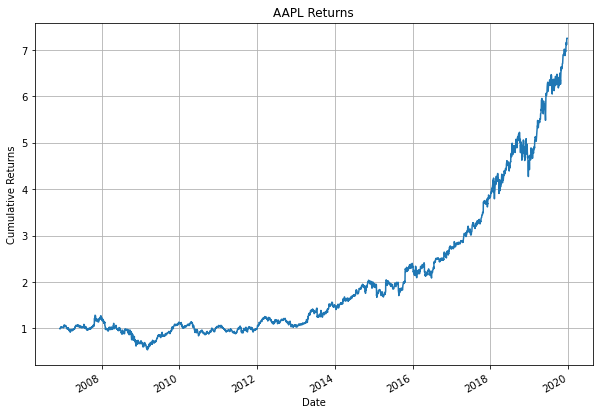

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 7))
# Access the dataframe of AAPL from the dictionary and then compute and plot the returns
(stock_data_dictionary['AAPL'].daily_pct_change+1).cumprod().plot()
# Set the title and axis labels and plot grid
plt.title('AAPL Returns')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_pct_change,pct_change_10,std_10,return_next_day,...,pct_change_35,std_35,pct_change_40,std_40,pct_change_45,std_45,pct_change_50,std_50,pct_change_55,std_55
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-06,29.129999,28.870001,29.100000,28.990000,48564100.0,21.479090,-0.004806,-0.031374,0.005815,-0.004829,...,0.023176,0.005958,0.050235,0.006858,0.062089,0.007198,0.068361,0.006933,0.081206,0.007279
2006-12-07,29.070000,28.809999,28.959999,28.850000,46831100.0,21.375368,-0.004829,-0.036203,0.005726,0.019064,...,0.015535,0.006017,0.050823,0.006844,0.036435,0.006615,0.054709,0.006902,0.064463,0.007184
2006-12-08,29.400000,28.799999,28.820000,29.400000,108854900.0,21.782871,0.019064,-0.011792,0.009111,0.004762,...,0.042663,0.006607,0.045195,0.006394,0.056215,0.007147,0.075231,0.007343,0.093829,0.007403
2006-12-11,29.750000,29.110001,29.190001,29.540001,107712000.0,21.886606,0.004762,0.002379,0.008785,-0.003724,...,0.042476,0.006604,0.044642,0.006385,0.062767,0.007150,0.081817,0.007342,0.107513,0.007268
2006-12-12,29.629999,29.219999,29.559999,29.430000,68529400.0,21.805098,-0.003724,0.001708,0.008815,0.004077,...,0.038049,0.006656,0.038098,0.006424,0.064426,0.007119,0.077728,0.007379,0.092911,0.007202


In [ ]:
# Create a placeholder for the train and test split data
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()
for stock_name in stock_list:
# Get predictor variables
    X = stock_data_dictionary[stock_name][predictor_list]
# Get the target variable
    y = stock_data_dictionary[stock_name].actual_signal
# Divide the dataset into train and test
    train_length = int(len(X)*0.80)
    X_train = X_train.append(X[:train_length])
    X_test = X_test.append(X[train_length:])
    y_train = y_train.append(y[:train_length])
    y_test = y_test.append(y[train_length:])

In [ ]:
# Initialize the model and set the hyperparameter values
model = XGBClassifier(max_depth=2, n_estimators=30,learning_rate=0.1)
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

All right, we will now perform cross-validation on the train set to check the accuracy.

In [ ]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7)
# Perform K-Fold Cross Validation
results = cross_val_score(model, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 60.58% (0.00%)


In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

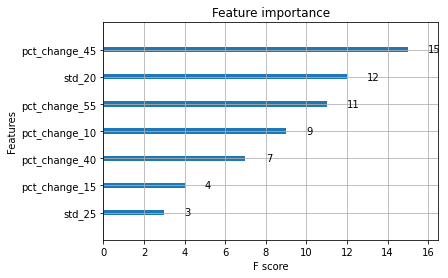

In [ ]:
# Plot the top 7 features
xgboost.plot_importance(model, max_num_features=7)
# Show the plot
plt.show()

That’s interesting. The XGBoost python model tells us that the pct_change_40 is the most important feature of the others. Since we had mentioned that we need only 7 features, we received this list. Here’s an interesting idea, why don’t you increase the number and see how the other features stack up, when it comes to their f-score. You can also remove the unimportant features and then retrain the model. 

In [ ]:
# Predict the trading signal on test dataset
y_pred = model.predict(X_test)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.61      0.51      1405
           1       0.60      0.43      0.50      1880

    accuracy                           0.51      3285
   macro avg       0.52      0.52      0.51      3285
weighted avg       0.53      0.51      0.51      3285



Hold on! We are almost there. Let’s see what XGBoost tells us right now:

That’s interesting. The f1-score for the long side is much more powerful compared to the short side. We can modify the model and make it a long-only strategy. 

Let’s try another way to formulate how well XGBoost performed. 

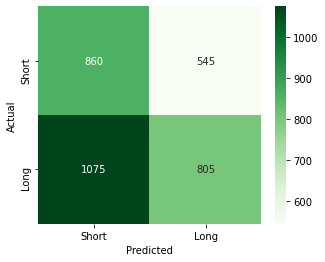

In [ ]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AAPL


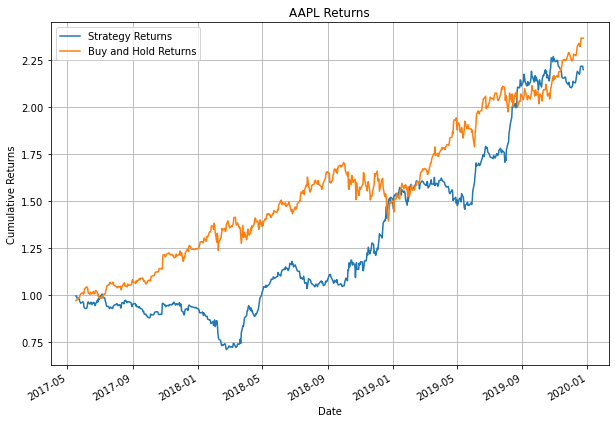

AMZN


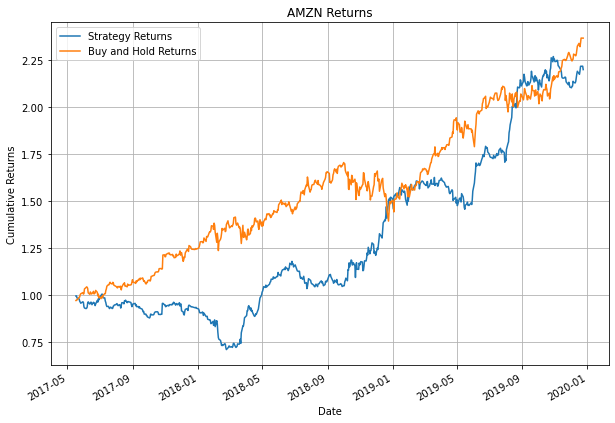

NFLX


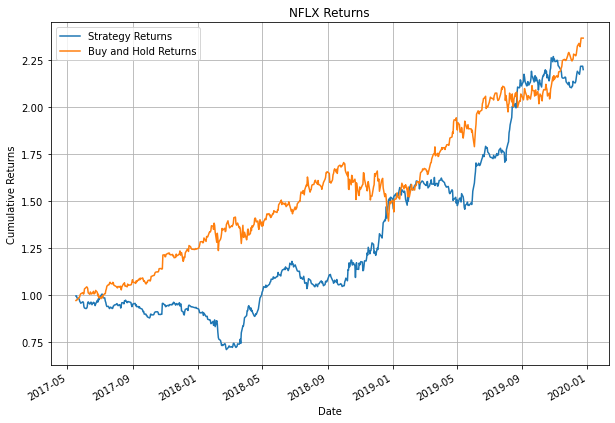

NVDA


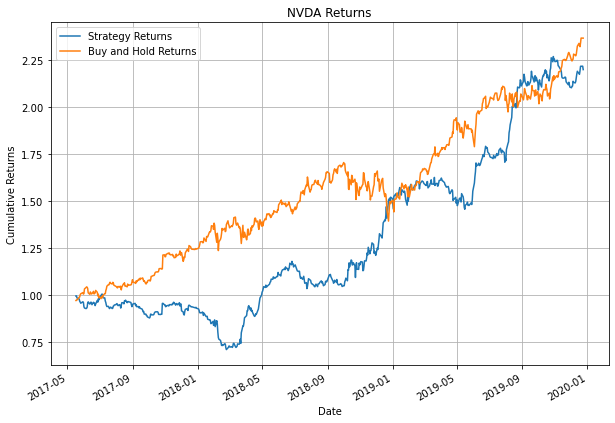

MSFT


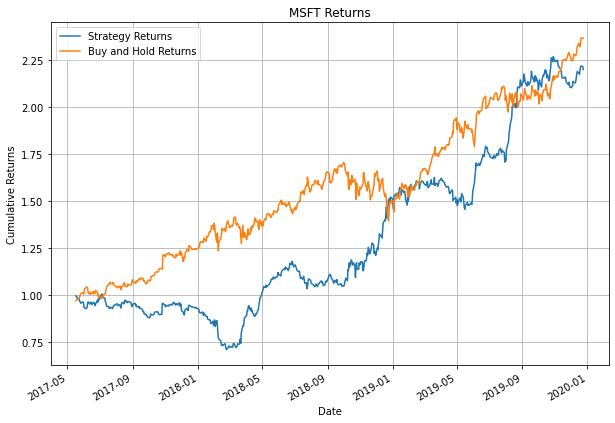

In [ ]:
# Create an empty dataframe to store the strategy returns of individual stocks
portfolio = pd.DataFrame(columns=stock_list)
# For each stock in the stock list, plot the strategy returns and buy and hold returns
for stock_name in stock_list:
# Get the data
    df = stock_data_dictionary[stock_name]
# Store the predictor variables in X
    X = df[predictor_list]
# Define the train and test dataset
    train_length = int(len(X)*0.80)
# Predict the signal and store in predicted signal column
    df['predicted_signal'] = model.predict(X)
# Calculate the strategy returns
    df['strategy_returns'] = df.return_next_day * df.predicted_signal
# Add the strategy returns to the portfolio dataframe
    portfolio[stock_name] = df.strategy_returns[train_length:]
# Plot the stock strategy and buy and hold returns
    print(stock_name)
# Set the figure size
    plt.figure(figsize=(10, 7))
# Calculate the cumulative strategy returns and plot
    (df.strategy_returns[train_length:]+1).cumprod().plot()
# Calculate the cumulative buy and hold strategy returns
    (stock_data_dictionary[stock_name][train_length:].daily_pct_change+1).cumprod().plot()
# Set the title, label and grid
    plt.title(stock_name + ' Returns')
    plt.ylabel('Cumulative Returns')
    plt.legend(labels=['Strategy Returns', 'Buy and Hold Returns'])
    plt.grid()
    plt.show()

https://blog.quantinsti.com/xgboost-python/#XGBoost-python

# XGBoost for Classification

### Steps:

* Firstly, the fitting of the training data is done by making an initial prediction of the target value. This value can be anything but by default it is 0.5, regardless of whether you are using for regression or classification.
*  Now, just like the unextreme gradient boost, XGBoost fits the regression tree to the residuals. 

##### Building the unique DT in XGBoost:
* Each tree starts out with a single tree and all the residuals go to the single leaf. Now, we calculate a quality score or similarity score for the residuals. 
`Similarity score= (Sum of residuals)^2 / ( sum of (previous prob_i)(1-previous prob_i) + lambda)`
Here, lambda is a Regularisation parameter. (Default=0)
Split the residuals and calculate the respective Similarity score for each node. Splitting is done by putting one of the residuals in first leaf and rest in others and then, shifting each leaf from second to first leaf one at a time. 
Note: when the residuals are similar or there is just one of them, they donot cancel out and the similarity score is large.
* The best split is decided by calculating the Gain. `Gain= Similarity score for left leaf +  Similarity score for right leaf -  Similarity score for above node` . The split for which the Gain value is maximum is taken as a final split. 
* Again, the split of the leaf node calculated above is splitted by calculating the similarity score and calculating the gain for the best split. This goes on until the max_depth of tree is specified or the no of residual values in tree is a single number.

##### Concept of Cover in XGBoost for classification:
For limiting the levels in each DT made, we limit the levels by specifying the max_depth. 
XGBoost also has a property of setting the threshold for the maximum number of residuals in each leaf. Note: The minimum number of residuals in each leaf is deterined by something called **COVER**
It is defined as the denominator of similarity score minus lambda.

Cover for Classification is `sum of (previous prob_i)(1-previous prob_i)`
and For Regression is `No of Residuals`

By default, the minimum value of Cover is 1. Thus, by default when we use XGBoost for regression, we have as few as 1 residual per leaf. Thus, using this default value has no effect on how we grow the tree. BUT, in Classification case, things are different because here, Cover depends on the previously predicted probability of each residual in a leaf. If for a leaf, Cover<1(default) , the algorithm will not allow that leaf and thus removes it from the tree. So, in most cases, we get the value of cover<1, which whill remove the whole tree leading to bad prediction. Thus, in order to prevent it from happening, the minumum value of cover is set to 0 in case of building the model for classifiation. Thus, setting the min_child_weight paarmeter = 0.


##### The pruning of the Unique DT in XGBoost:
* the pruning pf DT in XGBoost is done based on its gain values. We start picking a number called `gamma`. 
* After deciding the value for gamma we calculate the value of `Gain - gamma` .
* We calculate the above value by starting with the lowest stump(or branch) in the tree and thus , moving upwards
* if this value is negative, we prune the stump and if positive we donot prune the stump.

##### Back to the Similarity score for values if lambda:
* if lambda > 0 , the Similarity score gets smaller.
* considering the criteria of pruning `Gain - gamma` as the similarity score dereases the value of Gain decreases  and hence it increases the chances of getting a negative values for `Gain - gamma` and hence, for positive lambda values, it is easier to prune the leaves. and reduces the sensitivity of the tree to individual observations by pruning and combining with other observations.

##### Back to the value of Gamma(Complexity Parameter):
* sometimes, with extensive splitting of trees, Gain values becomes negative (especiually when lambda is positive) and thus even when the value of gamma is 0 . th value of `Gain - gamma` is still negative leading to pruning that stump and hence, we conclude that setting gamma= 0 doesnot turn off pruning.
 
And hence we can clearly see that setting positive values for lambda, helps us avoiding overfitting to the training data.

##### Determining the Output Values for leaves:
`Output Values for leaves= (Sum of residuals)/(sum of (previous prob_i)(1-previous prob_i)+ lambda)`
Note: If lambda=0 , the output value will come out to be just the same as unextreme Gradient Boost.
And if lambda value is positive, then it will reduce the amount that the respective observation is adding to the overall prediction. Thus, the Regularisation parameter lambda, will reduce the prediction's sensitivity the individual observation.

##### Back to the procedure:
Now we have made our first DT. 
Just like unextreme GBM, XGB makes the prediction by starting with the intial prediction and adding the output of the first DT and scaled by a learning rate. In classification, we have the inigtial prediction as probability value (p), but we need to convert it to log(odds) value.

$ Log(odds)=log(\frac {p}{1-p})$ .. This become the output value for the initla prediction.
Note that XGBoost calls the learning rate as eta and the default is 0.3 

We can now calculate new log(odds) prediction for each sample in training data and DT (which are in terms of log(odds)) and hence a new probability from the logistic regression formula: $ \frac{e^(log(odds))}{1+e^(log(odds))} $ scaling it to 0 and 1. This is the new predicted probability.

After this we repeat our steps for calculating the DT's, we will calculate the residual values. Here, note that now the new residual is smaller than before, which means that now, we have taken a small step in the right direction. 
And thus, we will build the new DT based on the new pseudo residuals and make new predictions that will give us even smaller residuals. Note: when building the second tree and more, calculating the similarity score is a little more interesting as it is no longer the same for all the observations
Note: The previous probability is previously predicted probability for that sample. 

And thus, we keep building trees until the residuals are super small or we have reached the maximum number of trees to be built.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
data=pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\diabetes.csv')
data.shape

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=data.drop('Outcome',axis=1)
y=data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(learning_rate=0.3, min_child_weight=0,max_depth=10, objective='reg:logistic')
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test,pred)

0.7835497835497836

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test,pred)

0.7402597402597403

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(learning_rate=0.2, min_child_weight=0,max_depth=6, objective='binary:logistic')
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test,pred)

0.7272727272727273

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(learning_rate=0.2, min_child_weight=0,max_depth=6, objective='binary:logistic',
                   gamma=0.1)
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test,pred)

C:\Users\sanjana grover\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: name 'X_train' is not defined